In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

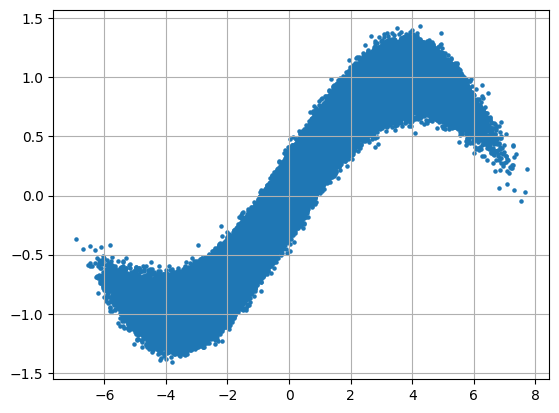

In [2]:
np.random.seed(1234)
x=np.concat([np.random.normal(-2.3,1,500000),np.random.normal(-0.1,0.8,400000),np.random.normal(2.3,1.2,450000)])
y=np.sin(0.4*x)+np.random.normal(0,0.1,1350000)
df=pd.DataFrame({'x':x,'y':y})

plt.scatter(df['x'],df['y'],s=5)
plt.grid()

# Discretización

In [3]:
bins=3
discretizador=DecisionTreeRegressor(max_leaf_nodes=bins)
discretizador.fit(df[['x']],df['y'])

DecisionTreeRegressor(max_leaf_nodes=3)

In [4]:
df['tree']=discretizador.predict(df[['x']]) # Variable categórica codificada (promedio de la variable 'y')
df.head(10)

,x,y,tree
0,-1.828565,-0.746743,-0.821459
1,-3.490976,-0.857561,-0.821459
2,-0.867293,-0.122020,-0.268027
3,-2.612652,-0.808089,-0.821459
4,-3.020589,-0.997937,-0.821459
5,-1.412837,-0.437947,-0.268027
6,-1.440412,-0.509688,-0.268027
7,-2.936524,-1.020815,-0.821459
8,-2.284304,-0.665808,-0.821459
9,-4.542685,-1.050095,-0.821459


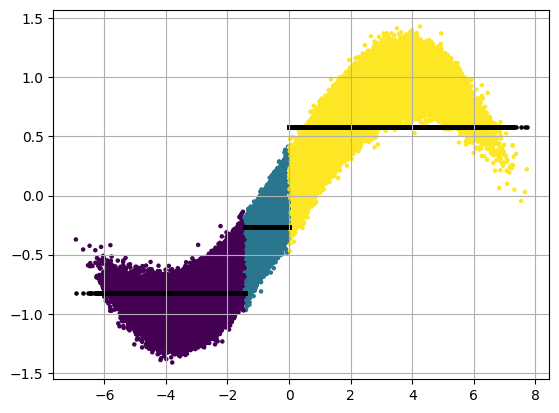

In [5]:
plt.scatter(df['x'],df['y'],s=5,c=df['tree'])
plt.scatter(df['x'],df['tree'],s=5,c='k')
plt.grid()

[Text(0.6, 0.8333333333333334, 'x <= -0.007\nsquared_error = 0.451\nsamples = 1350000\nvalue = -0.047'),
 Text(0.4, 0.5, 'x <= -1.442\nsquared_error = 0.105\nsamples = 725291\nvalue = -0.589'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.028\nsamples = 421300\nvalue = -0.821'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.035\nsamples = 303991\nvalue = -0.268'),
 Text(0.8, 0.5, 'squared_error = 0.114\nsamples = 624709\nvalue = 0.583'),
 Text(0.7, 0.6666666666666667, '  False')]

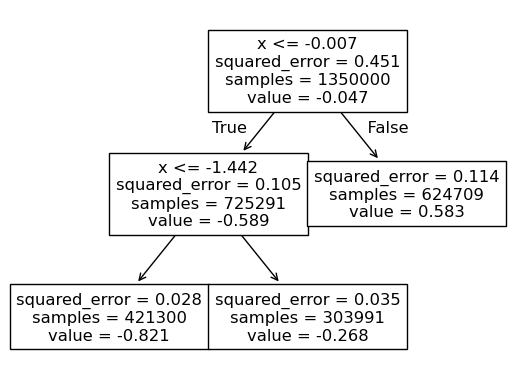

In [9]:
plot_tree(discretizador,feature_names=['x'])

# Regresión lineal

In [ ]:
#@title Usando los valores discretizados
y=df.groupby('tree')['y'].mean()
x=df.groupby('tree')['x'].mean()
y,df['tree'].unique()

(tree
 -0.821459   -0.821459
 -0.268027   -0.268027
  0.582873    0.582873
 Name: y, dtype: float64,
 array([-0.82145931, -0.2680268 ,  0.58287282]))

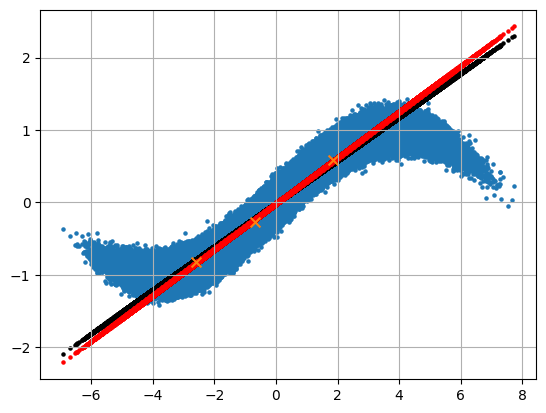

In [ ]:
reg_tree=LinearRegression()
reg_tree.fit(x.values.reshape(-1,1),y)

reg=LinearRegression()
reg.fit(df[['x']],df['y'])

plt.scatter(df['x'],df['y'],s=5)
plt.scatter(df['x'],reg.predict(df[['x']]),s=5,c='k')
plt.scatter(df['x'],reg_tree.predict(df[['x']].values),s=5,c='r')
plt.scatter(x,y,s=50,marker='x')
plt.grid()

In [ ]:
#@title Para cada conjunto de datos
lin_tree={}
for catego in df['tree'].unique():
  lin_tree[catego]=LinearRegression()
  lin_tree[catego].fit(df[df['tree']==catego][['x']],df[df['tree']==catego]['y'])


In [ ]:
def f(x):
  return lin_tree[x['tree']].coef_[0]*x['x']+lin_tree[x['tree']].intercept_

df['lin_tree']=df.apply(f,axis=1)

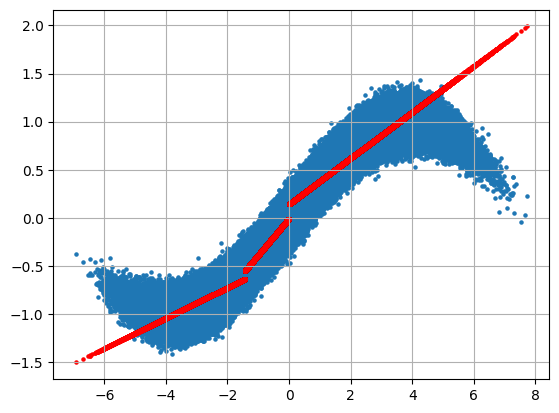

In [ ]:
plt.scatter(df['x'],df['y'],s=5)
plt.scatter(df['x'],df['lin_tree'],s=5,c='r')
plt.grid()
#